In [1]:
using Distributions
using LinearAlgebra
using PyPlot
using ProgressMeter
using Random

# Load and Test Scripts

In [2]:
include("./../scripts/Grid.jl")

kernmat (generic function with 1 method)

  0.749840 seconds (174.78 k allocations: 438.619 MiB, 38.48% gc time, 11.38% compilation time)
0.9998754938835532

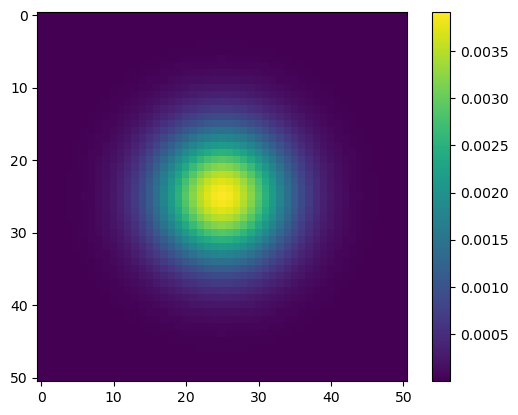

In [3]:
let n = 51
    l = 1.0
    sig = l/8
    kernmat(x->exp(-x^2/(2sig^2))/(2pi*sig^2),l,2) # compile
    @time A = kernmat(x->exp(-x^2/(2sig^2))/(2π*sig^2),l,n)
    centidx = (n÷2)*n+n÷2+1
    imshow(unflatten(A[centidx,:],n))
    colorbar()
    print(sum(unflatten(A[centidx,:],n)))
end

# Numerically Diagonalize $L^P$ Operator

In [4]:
function buildLP(rho::Float64,zet::Float64,eta::Float64,l::Float64,n::Int64)
    Amat = kernmat(x->exp(-x^2/(2rho^2))/(2pi*rho^2),l,n)
    Cmat = kernmat(x->exp(-x^2/(2zet^2))/(2pi*zet^2),l,n)
    Imat = kernmat(x->exp(-x^2/(2eta^2))/(2pi*eta^2),l,n)
    
    srAmat = sqrt.(Amat)
    srAvec = flatten(srAmat)
    
    L = srAvec.*kron(Imat,Cmat).*srAvec'
    
    P = Matrix{Float64}(I(n^4))
    grididxs = unflatten([1:n^2;],n)
    Pbet = zeros(n^2)
    for i in 1:n, j in 1:n
        grididx = grididxs[i,j]
        Pbet[grididx] = 1.0
        aPbet = kron(srAmat[:,grididx],Pbet)
        BLAS.ger!(-1.0,aPbet,aPbet,P)
        Pbet[grididx] = 0.0
    end
    
    return P*L*P
end

buildLP (generic function with 1 method)

In [5]:
function buildzerofreqLP(rho::Float64,zet::Float64,eta::Float64,l::Float64,n::Int64)
    mu2 = eta^2 + zet^2
    Amat = kernmat(x->exp(-x^2/(2rho^2))/(2pi*rho^2),l,n)
    Mmat = kernmat(x->exp(-x^2/(2mu2))/(2pi*mu2),l,n)
    
    srAmat = sqrt.(Amat)
    srAvec = srAmat[1,:]
    
    L = srAvec.*Mmat.*srAvec'
    
    P = I - srAvec.*srAvec'
    
    return P*L*P
end

buildzerofreqLP (generic function with 1 method)

In [6]:
function projzerofreq(A::Matrix{Float64},l::Float64,n::Int64)
    intmat = kernmat(x->1,l,n)
    projmat = zeros(n^2,n^2)
    projmat[1,1] = (n/l)^2
    idmat = Matrix{Float64}(I(n^2))
    
    Azf = kron(intmat,idmat)*A*kron(projmat,idmat)
    return Azf[1:n^2,1:n^2]
end

projzerofreq (generic function with 1 method)

  0.396527 seconds (5.10 k allocations: 265.509 MiB, 11.78% gc time)
  2.359650 seconds (1.82 M allocations: 141.958 MiB, 1.26% gc time, 48.27% compilation time)


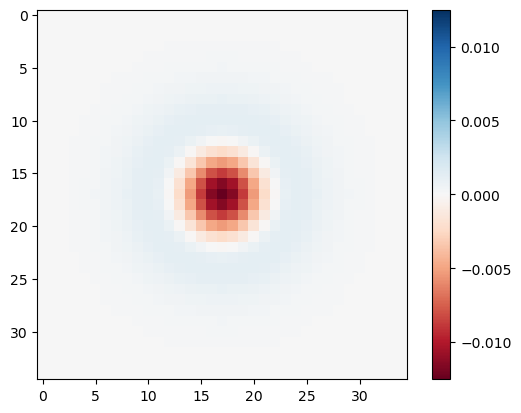

PyObject <matplotlib.colorbar.Colorbar object at 0x7f8659cc7550>

In [7]:
let rho = 6.5
    zet = 0.02*6.5
    eta = 0.2*6.5
    l = 5*6.5
    n = 35
    
    buildzerofreqLP(rho,zet,eta,l,2) # compile
    @time zfLP = buildzerofreqLP(rho,zet,eta,l,n)
    
    @time zfF = eigen(zfLP)
    
    Amat = kernmat(x->exp(-x^2/(2rho^2))/(2pi*rho^2),l,n)
    srAmat = sqrt.(Amat)
    srAvec = Diagonal(flatten(srAmat))
    
    Avec = kernmat(x->exp(-x^2/(2*rho^2))/(2pi*rho^2),l,n)[1,:]
    srAvec = sqrt.(Avec)
    psi = unflatten(real.(zfF.vectors[:,end]).*srAvec,n)
    maxpsi = maximum(abs.(psi))
    imshow(circshift(psi,((n-1)÷2,(n-1)÷2)),cmap="RdBu",vmin=-maxpsi,vmax=maxpsi)
    colorbar()
end

  0.369316 seconds (5.71 k allocations: 265.547 MiB, 15.35% gc time, 1.03% compilation time)
  1.230821 seconds (28 allocations: 47.097 MiB)


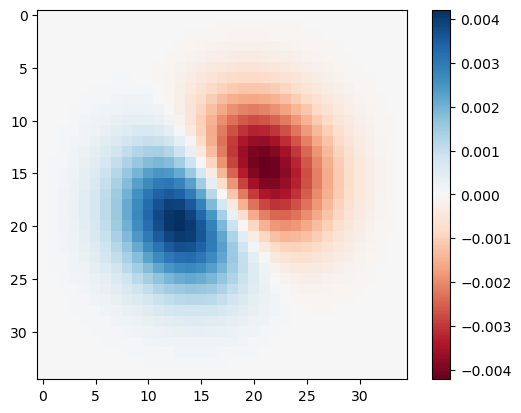

PyObject <matplotlib.colorbar.Colorbar object at 0x7f864b8e6880>

In [8]:
let rho = 6.5
    zet = 0.05*6.5
    eta = 0.7*6.5
    l = 5*6.5
    n = 35
    
    buildzerofreqLP(rho,zet,eta,l,2) # compile
    @time zfLP = buildzerofreqLP(rho,zet,eta,l,n)
    
    @time zfF = eigen(zfLP)
    
    Amat = kernmat(x->exp(-x^2/(2rho^2))/(2pi*rho^2),l,n)
    srAmat = sqrt.(Amat)
    srAvec = Diagonal(flatten(srAmat))
    
    Avec = kernmat(x->exp(-x^2/(2*rho^2))/(2pi*rho^2),l,n)[1,:]
    srAvec = sqrt.(Avec)
    psi = unflatten(real.(zfF.vectors[:,end]).*srAvec,n)
    maxpsi = maximum(abs.(psi))
    imshow(circshift(psi,((n-1)÷2,(n-1)÷2)),cmap="RdBu",vmin=-maxpsi,vmax=maxpsi)
    colorbar()
end